# Tiny pmaps tutorial

In [19]:
import os
import numpy  as np
from matplotlib import pyplot as plt

# You'll need the pmap_io module
from invisible_cities.io import pmap_io as pio

In [20]:
# and some pmaps
ic_data = os.path.join(os.environ['IC_DATA'])
pmap_path = ic_data + 'Montecarlo/Kr/irene/dst_NEXT_v1_00_05_Kr_ACTIVE_99_0_7bar_PMP_10000.h5'

In [21]:
pmap_path

'/Users/alej/Desktop/IC_DATA/Montecarlo/Kr/irene/dst_NEXT_v1_00_05_Kr_ACTIVE_99_0_7bar_PMP_10000.h5'

## Load Pmaps

In [22]:
s1_dict, s2_dict, s2si_dict = pio.load_pmaps(pmap_path)
# where s2_dict (for ex) maps event number --> s2 
#     (where s2 is a high level object containing all 
#      the s2-like peaks found in that event)

In [42]:
# Quick housekeeping 
# to get access to the set of all keys in these dicts
events = list(set(list(s1_dict.keys()) + list(s2_dict.keys()) + list(s2si_dict.keys())))
nevts = len(events)

# and to for plotting peaks
def plot_s12_peaks(s12):
    # Loop over peaks of type s12 (hopefully usually there is exactly 1)
    for pn in s12.peaks:
        plt.figure(figsize=(10,3))
        plt.plot(s12.peak_waveform(pn).t, s12.peak_waveform(pn).E)
        plt.grid(True)
        plt.title('Cumulative pmt waveform')
        plt.ylabel('photoelectrons')
        plt.xlabel('ns')
        plt.show()

### We'll take a look at a random event.
*Note: an event need not contain an S1 and S2 and S2Si

In [43]:
sample_event = np.random.choice(events)
sample_event

990397

### S1

S1 (number of peaks = 1)
peak number = 0: 
Peak|samples   = 14
    |width     = 325 ns
    |energy    = 15.7 pes
    |height    = 2.1 pes
    |tmin-tmax = minmax(min=100075.0, max=100400.0) ns
 



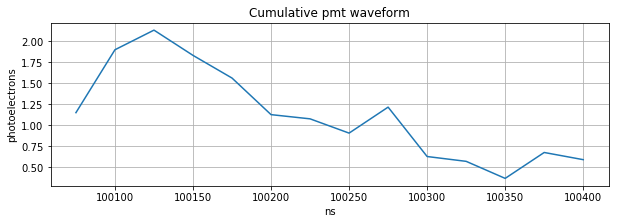

In [44]:
try: 
    s1 = s1_dict[sample_event]
    print(s1)
    plot_s12_peaks(s1)
except KeyError: print('This event has no S1 candidate peaks')

### S2

S2 (number of peaks = 1)
peak number = 0: 
Peak|samples   = 9
    |width     = 7.6 mus
    |energy    = 6676.6 pes
    |height    = 1712.3 pes
    |tmin-tmax = minmax(min=298.7625, max=306.33750000000003) mus
 



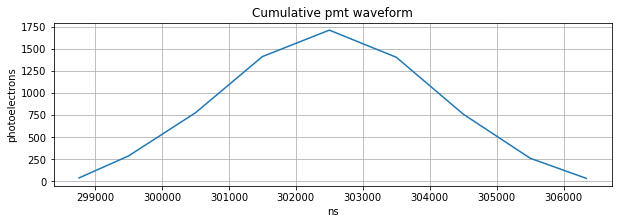

In [45]:
try: 
    s2 = s2_dict[sample_event]
    print(s2)
    plot_s12_peaks(s2)
except KeyError: print('This event has no S2 candidate peaks')

## S2Si


S2Si instance

S2 (number of peaks = 1)
peak number = 0: 
Peak|samples   = 9
    |width     = 7.6 mus
    |energy    = 6676.6 pes
    |height    = 1712.3 pes
    |tmin-tmax = minmax(min=298.7625, max=306.33750000000003) mus
 


Peaks

peak number = 0, nsipm in peak = 13

SiPM waveforms

----------------------------------------
peak number = 0, sipm number = 264, zs-waveform = 
Peak|samples   = 5
    |width     = 4.0 mus
    |energy    = 38.6 pes
    |height    = 11.2 pes
    |tmin-tmax = minmax(min=300.5, max=304.5) mus

----------------------------------------
peak number = 0, sipm number = 265, zs-waveform = 
Peak|samples   = 4
    |width     = 3.0 mus
    |energy    = 9.6 pes
    |height    = 3.1 pes
    |tmin-tmax = minmax(min=301.5, max=304.5) mus

----------------------------------------
peak number = 0, sipm number = 272, zs-waveform = 
Peak|samples   = 7
    |width     = 6.0 mus
    |energy    = 139.9 pes
    |height    = 34.7 pes
    |tmin-tmax = minmax(min=299.5, max=305.5) 

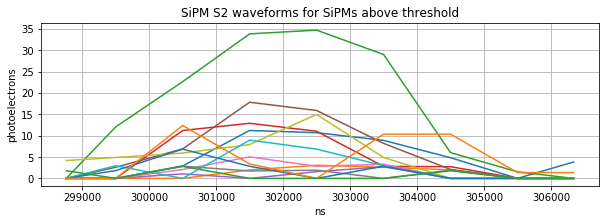

In [46]:
try: 
    s2si = s2si_dict[sample_event]
    print(s2si)
    for pn in s2si.peaks:
        plt.figure(figsize=(10,3))
        for sipm in s2si.sipms_in_peak(pn):
            plt.plot(s2si.sipm_waveform(pn, sipm).t, s2si.sipm_waveform(pn, sipm).E)
        plt.grid(True)
        plt.title('SiPM S2 waveforms for SiPMs above threshold')
        plt.ylabel('photoelectrons')
        plt.xlabel('ns')
        plt.show()
except KeyError: print('This event has no S2Si candidate peaks')